>우리가 놓치고 있는 중요한 고객의 패턴 확인  
혹은 새로운 기준에 따라 유저 그룹화  
특정 기준에 따라 군집화. 군집별 인사이트 도출 -> 서비스 반영에 대한 방향성 제시

주제
- 데이터셋 현황 파악
- 다양한 조건(군집갯수, 컬럼갯수)을 통해 결과를 비교
- 군집(클러스터)별로 유의미한 특징을 살펴보고 이를 시각화
- 군집별 인사이트를 제시

설명
- 각 테이블을 결합하여, 클러스터링을 위한 하나의 데이터셋으로 
- 이상치 처리 기법을 활용하거나, 특정 기준을 세워 이상치를 정의 하고 그 이유를 설명
- 클러스터링시, 초기 군집의 갯수와 사용할 컬럼의 갯수는 python 머신러닝 라이브러리를 활용
- 컬럼별 raw data 분포 시각화
- 컬럼 간 상관계수를 히트맵 차트로 구현해주세요.  
(유의미한 기준은 +0.6(양의 상관관계) 또는 -0.6(음의 상관관계)으로 판단해주시면 됩니다) 

선택사항
- 필요하다면 파생변수를 생성
- 표준화 방법을 여러가지 사용해보시고, 비교해주셔도 됩니다.
- 범주형 데이터를 사용할 경우, 인코딩을 진행해주세요. 원-핫 인코딩/라벨인코딩 모두 사용해도 됩니다.  
다만, 범주의 갯수가 많은 경우, 별도 세그멘테이션이 필요할 수 있겠습니다. 의미있는 기준을 세워주시고 그 값을 인코딩 진행해주세요.  
(예시: 국가가 100개인 경우 육대륙으로 나누어 인코딩). 참고자료: https://nicola-ml.tistory.com/62#google_vignette   
- 분석 결과를 한 눈에 파악할 수 있도록 datapane 으로 리포트를 구현


# 데이터 불러오기

In [1]:
# !kaggle datasets download -d quangvinhhuynh/marketing-and-retail-analyst-e-comerce

In [2]:
# import shutil

# filename = 'marketing-and-retail-analyst-e-comerce.zip' # 압축 해제할 파일 이름
# extrac_dir = 'dataset' # 압축 해제할 폴더 이름
# archive_format = 'zip' # 압축 파일 형태

# shutil.unpack_archive(filename, extrac_dir, archive_format)

# import os

# # 파일들이 있는 폴더명으로 폴더내 파일 목록 확인
# os.listdir('dataset/') 

# import

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# dataset = pd.read_excel('데이터셋/Retail_dataset.xlsx', sheet_name = None)
# dataset

In [5]:
customers= pd.read_csv('dataset/customers.csv')
orders= pd.read_csv('dataset/orders.csv')
order_items= pd.read_csv('dataset/order_items.csv')
payments= pd.read_csv('dataset/payments.csv')
products= pd.read_csv('dataset/products.csv')

customers 파악


In [6]:
# customers = pd.read_excel('dataset/Retail_dataset.xlsx', sheet_name= 'customers')
# customers.equals(customers_csv)
# -- 결과 True 나옴
customers.head(3)

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


- customer_zip_code_prefix
: 고객 우편번호 접두사
- customer_city
: 도시
- customer_state
: 주

--> 브라질

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_zip_code_prefix  99441 non-null  int64 
 2   customer_city             99441 non-null  object
 3   customer_state            99441 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


In [8]:
customers['customer_zip_code_prefix'].value_counts()
customers['customer_zip_code_prefix'].unique()
customers['customer_zip_code_prefix'].nunique()
customers['customer_zip_code_prefix'].value_counts()

customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
        ... 
35698      1
99370      1
64808      1
60876      1
99043      1
Name: count, Length: 14994, dtype: int64

In [9]:
customers[customers['customer_zip_code_prefix'] == 9790]
# 우편번호를 알면 state를 알 수 있음 (우편번호 맨 앞자리로)

,customer_id,customer_zip_code_prefix,customer_city,customer_state
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
8375,d62a4aa312159ff0bb1266d53a891f47,9790,sao bernardo do campo,SP
14443,7fd9feb1225a53711abe04e7c2b1348d,9790,sao bernardo do campo,SP
15996,0a58eee37208a659eba0b9d8fbb373d4,9790,sao bernardo do campo,SP
18060,46d8cbad99a81795a10171a0db3a0def,9790,sao bernardo do campo,SP
19467,7fb1599a88a6b7d15f100b29908d25bd,9790,sao bernardo do campo,SP
20260,de0a38ba2aba5b3c8466302afe76508c,9790,sao bernardo do campo,SP
21405,83048e04387482dd32e70974b6f656b5,9790,sao bernardo do campo,SP
36126,5c4532e92c92ee3c58cd84d7eb15e0be,9790,sao bernardo do campo,SP
39257,07764275128858358b70ccccaa68d3a4,9790,sao bernardo do campo,SP


In [10]:
customers['customer_city'].value_counts()

customer_city
sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: count, Length: 4119, dtype: int64

In [11]:
customers['customer_state'].value_counts()
customers['customer_state'].nunique() # 27개
customers['customer_state'].value_counts()
# 9만 9천개 가량의 데이터가 있는데 약 4만개가 상파울루

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

-> 분석 시 state로 묶는 것이 좋을 것이라 예상됨. 비교적 간단한 값이라. 

관광지이거나 브라질내에서 유명한 장소 -- 1 2 3등이 전부 관광지?  
+ 각 데이터 분포

In [12]:
customers.describe(include='all')

,customer_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441.000000,99441,99441
unique,96096,NaN,4119,27
top,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,17,NaN,15540,41746
mean,NaN,35137.474583,NaN,NaN
std,NaN,29797.938996,NaN,NaN
min,NaN,1003.000000,NaN,NaN
25%,NaN,11347.000000,NaN,NaN
50%,NaN,24416.000000,NaN,NaN
75%,NaN,58900.000000,NaN,NaN


In [13]:
customers.columns

Index(['customer_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state'],
      dtype='object')

<Axes: ylabel='customer_zip_code_prefix'>

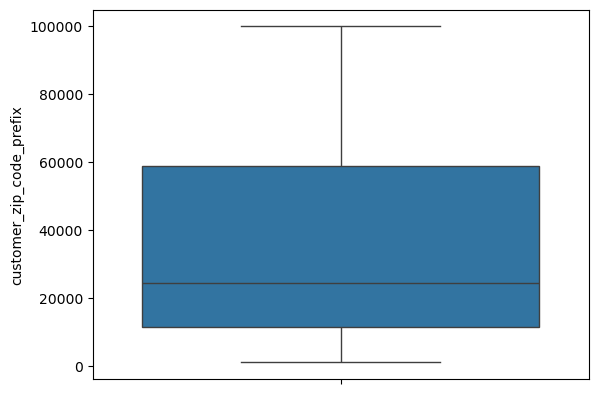

In [14]:
sns.boxplot(customers['customer_zip_code_prefix'])
# 0nnnn: 상파울루(수도)
# 1nnnn: 상파울루 주
# 2nnnn: 리우데자네이루 & 에스피리투 산투
# 3nnnn: 미나스 제라이스

# 리우데자네이루: 브라질에서 두 번째로 큰 경제 규모. 브라질 인구의 8.2 거주
# 에스피리투 산투: 국가의 주요 항구 중 일부 존재. 관광 명소
# 미나스 제라이스: 브라질 내 GDP 3등. 금, 커피, 수력 발전소

<Axes: ylabel='customer_city'>

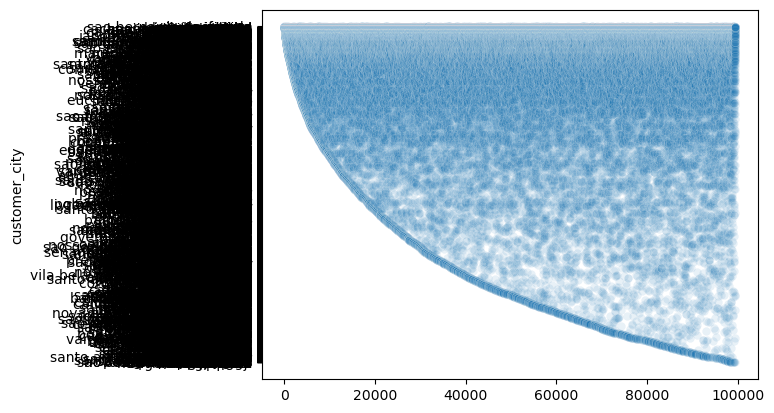

In [15]:
#sns.scatterplot(customers['customer_city'], alpha= 0.1)
# 신기하당.. 근데 별로 상관없는 데이터! city 라서도 그렇고, x축은 데이터프레임 행 순서일 뿐

<Axes: ylabel='customer_state'>

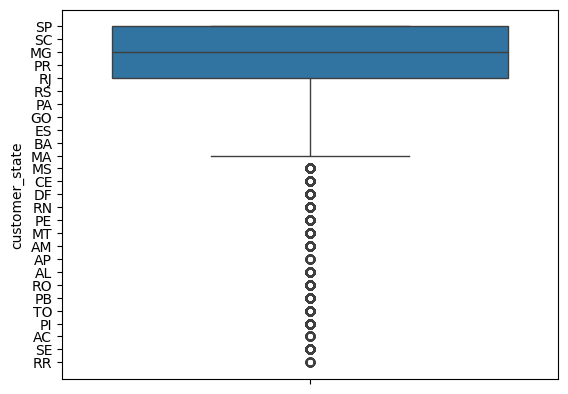

In [16]:
sns.boxplot(customers['customer_state'])

# SP: 상파울루 São Paulo
# SC: 산타 카타리나 Santa Catarina
# MG: 미나스 제라이스 Minas Gerais
# PR: 파라나 Paraná
# RJ: 리우데자네이루 Rio de Janeiro
# RS: 히우그란지두술 Rio Grande do Sul

In [17]:
customers['customer_state'].value_counts().head(6)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
Name: count, dtype: int64

명목형에 맞는 시각화

([<matplotlib.patches.Wedge at 0x26bc645cb00>,
 [Text(0.2742057728919482, 1.0652751729542604, 'SP'),
  Text(-1.0947390103737555, 0.1074546377123405, 'RJ'),
  Text(-0.8582521080374302, -0.6880431084236709, 'MG'),
  Text(-0.38211043352397644, -1.031499692967535, 'RS'),
  Text(-0.024967038715228162, -1.0997166212155713, 'PR'),
  Text(0.2738355154504174, -1.0653704099880024, 'SC'),
  Text(0.5013810120500376, -0.979089924754453, 'BA'),
  Text(0.6636563769401317, -0.877245811244886, 'DF'),
  Text(0.7732148606721951, -0.7823929826089175, 'ES'),
  Text(0.8667925401440212, -0.6772523107016141, 'GO'),
  Text(0.9393569407893235, -0.572370979165544, 'PE'),
  Text(0.9891254457406187, -0.4812804302986177, 'CE'),
  Text(1.021597580612774, -0.4078460288958656, 'PA'),
  Text(1.0440274336865478, -0.3464198575570992, 'MT'),
  Text(1.0606960082553372, -0.29141718904552255, 'MA'),
  Text(1.0730200601983397, -0.24213209289962268, 'MS'),
  Text(1.081749250857177, -0.19954588011266033, 'PB'),
  Text(1.0876739

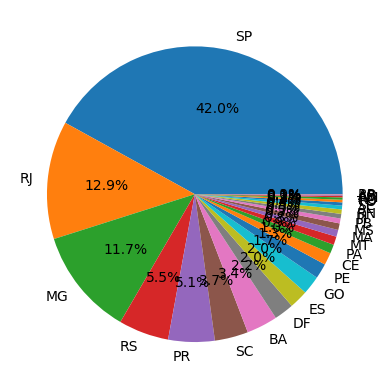

In [18]:
plt.pie(customers['customer_state'].value_counts()
        , labels= customers['customer_state'].value_counts().index
        , autopct = '%1.1f%%')

10% 이상인 상위 3개

<Axes: xlabel='customer_state', ylabel='count'>

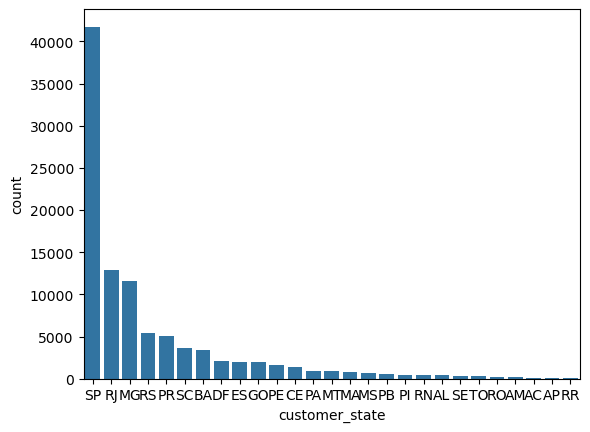

In [19]:
sns.countplot(data= customers, x= 'customer_state'
              , order= customers['customer_state'].value_counts().index)